In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, string, nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
punct = string.punctuation + ")" + "(" + ":" + ";"

In [354]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')
sample = pd.read_excel('Sample_Submission.xlsx')

In [355]:
train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [356]:
test.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [357]:
train.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
count,6237,6237,6237,6237,6237,6237,6237,6237,6237.000000
unique,5568,3679,3370,36,342,5549,345,11,NaN
top,A Game of Thrones (A Song of Ice and Fire),Agatha Christie,"Paperback,– 5 Oct 2017",5.0 out of 5 stars,1 customer review,A Tinkle Double Digest is two Tinkle Digests i...,Action & Adventure (Books),Action & Adventure,NaN
freq,4,69,48,1375,1040,8,947,818,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,560.707516
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.110657
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.180000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000


In [358]:
test.describe(include=['O','float'])

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
count,1560,1560,1560,1560,1560,1560,1560,1560
unique,1521,1224,1259,30,163,1519,225,11
top,Doing Justice: A Prosecutor’s Thoughts on Crim...,Agatha Christie,"Paperback,– 2016",5.0 out of 5 stars,1 customer review,The end is approaching ... Can Jack West unrav...,Action & Adventure (Books),Action & Adventure
freq,3,18,12,376,288,3,236,218


In [359]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [360]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [361]:
def words(text):
    return(len(str(text).lower().split()))

def letter(text):
    return(len(str(text)))

def n_stopwords(text):
    s = [w for w in str(text).lower().split() if w in stopwords]
    return(len(s))

def n_punctuation(text):
    s = [w for w in str(text).lower().split() if w in list(punct)]
    return(len(s))

def n_title(text):
    s = [w for w in str(text).lower().split() if w.islower()]
    return(len(s))

train['Title_count'] = train.Title.apply(lambda x: words(x))
test['Title_count'] = test.Title.apply(lambda x: words(x))

train['Synopsis_count'] = train.Synopsis.apply(lambda x: words(x))
test['Synopsis_count'] = test.Synopsis.apply(lambda x: words(x))

train['Title_count_char'] = train.Title.apply(lambda x: letter(x))
test['Title_count_char'] = test.Title.apply(lambda x: letter(x))

train['Synopsis_count_char'] = train.Synopsis.apply(lambda x: letter(x))
test['Synopsis_count_char'] = test.Synopsis.apply(lambda x: letter(x))

train['Title_n_st'] = train.Title.apply(lambda x: n_stopwords(x))
test['Title_n_st'] = test.Title.apply(lambda x: n_stopwords(x))

train['Synopsis_n_st'] = train.Synopsis.apply(lambda x: n_stopwords(x))
test['Synopsis_n_st'] = test.Synopsis.apply(lambda x: n_stopwords(x))

train['Title_n_punct'] = train.Title.apply(lambda x: n_punctuation(x))
test['Title_n_punct'] = test.Title.apply(lambda x: n_punctuation(x))

train['Synopsis_n_punct'] = train.Synopsis.apply(lambda x: n_punctuation(x))
test['Synopsis_n_punct'] = test.Synopsis.apply(lambda x: n_punctuation(x))

train['Title_title_word'] = train.Title.apply(lambda x: n_title(x))
test['Title_title_word'] = test.Title.apply(lambda x: n_title(x))

train['Synopsis_title_word'] = train.Synopsis.apply(lambda x: n_title(x))
test['Synopsis_title_word'] = test.Synopsis.apply(lambda x: n_title(x))

train['Title_0'] = train.Title.str.extract(r"(^.*):+(.*$)")[0]
train['Title_1'] = train.Title.str.extract(r"(^.*):+(.*$)")[1]

test['Title_0'] = test.Title.str.extract(r"(^.*):+(.*$)")[0]
test['Title_1'] = test.Title.str.extract(r"(^.*):+(.*$)")[1]


train['Title_0'] = train.Title_0.apply(lambda x: words(x))
test['Title_0'] = test.Title_0.apply(lambda x: words(x))

train['Title_1'] = train.Title_1.apply(lambda x: words(x))
test['Title_1'] = test.Title_1.apply(lambda x: words(x))

In [362]:
au_tr = set(train.Author).difference(set(test.Author))
au_te = set(test.Author).difference(set(train.Author))
train.Author = train.Author.apply(lambda x: 'other' if x in list(au_tr) else x)
test.Author = test.Author.apply(lambda x: 'other' if x in (au_te) else x)

In [363]:
train['Date'] = train.Edition.str.extract(r"(\d\d\d\d$)")
test['Date'] = test.Edition.str.extract(r"(\d\d\d\d$)")

In [364]:
train['Edition_t'] = train.Edition.str.extract(r'([a-zA-Z|\s]*),.*')
test['Edition_t'] = test.Edition.str.extract(r'([a-zA-Z|\s]*),.*')

In [365]:
train.Date.fillna(2014, inplace=True)
test.Date.fillna(2014, inplace=True)

x = set(train.Edition_t).difference(set(test.Edition_t))

In [366]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 23 columns):
Title                  6237 non-null object
Author                 6237 non-null object
Edition                6237 non-null object
Reviews                6237 non-null object
Ratings                6237 non-null object
Synopsis               6237 non-null object
Genre                  6237 non-null object
BookCategory           6237 non-null object
Price                  6237 non-null float64
Title_count            6237 non-null int64
Synopsis_count         6237 non-null int64
Title_count_char       6237 non-null int64
Synopsis_count_char    6237 non-null int64
Title_n_st             6237 non-null int64
Synopsis_n_st          6237 non-null int64
Title_n_punct          6237 non-null int64
Synopsis_n_punct       6237 non-null int64
Title_title_word       6237 non-null int64
Synopsis_title_word    6237 non-null int64
Title_0                6237 non-null int64
Title_1                

In [367]:
train.Edition_t.replace({'':'other'}, inplace=True)
test.Edition_t.replace({'':'other'}, inplace=True)

In [368]:
t = set(train.Edition_t.value_counts().index).difference(set(test.Edition_t.value_counts().index))
train.Edition_t = train.Edition_t.apply(lambda x: np.NaN if x in list(t) else x)

In [369]:
train.dropna(inplace=True)

In [370]:
train['Review_t'] = train.Reviews.str.extract(r"(^\d\.*\d*)")
test['Review_t'] = test.Reviews.str.extract(r"(^\d\.*\d*)")

In [371]:
train['Rating_t'] = train.Reviews.str.extract(r"(^\d*)")
test['Rating_t'] = test.Reviews.str.extract(r"(^\d*)")

In [372]:
train['Rat_Rev'] = train.Rating_t.astype('float') * train.Review_t.astype('float')
test['Rat_Rev'] = test.Rating_t.astype('float') * test.Review_t.astype('float')

train['Rat_Rev'] = train['Rat_Rev'].apply(lambda x: x/5)
test['Rat_Rev'] = test['Rat_Rev'].apply(lambda x: x/5)

In [373]:
train.Genre.value_counts()

Action & Adventure (Books)               945
Romance (Books)                          419
Biographies & Autobiographies (Books)    373
Crime, Thriller & Mystery (Books)        276
Contemporary Fiction (Books)             256
                                        ... 
Environmental Engineering                  1
Chemistry Books                            1
Vascular Surgery                           1
Structural Engineering                     1
Ecotourism                                 1
Name: Genre, Length: 345, dtype: int64

In [374]:
test.Genre.value_counts()

Action & Adventure (Books)               236
Romance (Books)                           98
Biographies & Autobiographies (Books)     90
Contemporary Fiction (Books)              69
Crime, Thriller & Mystery (Books)         59
                                        ... 
Children's Crime & Thriller (Books)        1
C# Programming                             1
Children's Sport (Books)                   1
Biotechnology Engineering Textbooks        1
Sports Medicine                            1
Name: Genre, Length: 225, dtype: int64

In [375]:
au_tr = set(train.Genre).difference(set(test.Genre))
au_te = set(test.Genre).difference(set(train.Genre))
train['Genre_t'] = train.Genre.apply(lambda x: 'other' if x in list(au_tr) else x)
test['Genre_t'] = test.Genre.apply(lambda x: 'other' if x in (au_te) else x)

In [376]:
train.head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Title_count,...,Title_title_word,Synopsis_title_word,Title_0,Title_1,Date,Edition_t,Review_t,Rating_t,Rat_Rev,Genre_t
0,The Prisoner's Gold (The Hunters 3),other,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,6,...,5,131,1,1,2016,Paperback,4.0,4,3.20,Action & Adventure (Books)
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,7,...,7,182,2,5,2012,Paperback,3.9,3,2.34,Cinema & Broadcast (Books)


In [377]:
train.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)
test.drop(columns = ['Title', 'Edition', 'Reviews','Ratings', 'Synopsis','Genre'], inplace=True)

In [378]:
print(train.info(), test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 0 to 6236
Data columns (total 21 columns):
Author                 6228 non-null object
BookCategory           6228 non-null object
Price                  6228 non-null float64
Title_count            6228 non-null int64
Synopsis_count         6228 non-null int64
Title_count_char       6228 non-null int64
Synopsis_count_char    6228 non-null int64
Title_n_st             6228 non-null int64
Synopsis_n_st          6228 non-null int64
Title_n_punct          6228 non-null int64
Synopsis_n_punct       6228 non-null int64
Title_title_word       6228 non-null int64
Synopsis_title_word    6228 non-null int64
Title_0                6228 non-null int64
Title_1                6228 non-null int64
Date                   6228 non-null object
Edition_t              6228 non-null object
Review_t               6228 non-null object
Rating_t               6228 non-null object
Rat_Rev                6228 non-null float64
Genre_t                

In [379]:
train.Author = train.Author.astype('category')
train.BookCategory = train.BookCategory.astype('category')
train.Edition_t = train.Edition_t.astype('category')
train.Genre_t = train.Genre_t.astype('category')
train.Rating_t = train.Rating_t.astype('float')
train.Review_t = train.Review_t.astype('float')


test.Author = test.Author.astype('category')
test.BookCategory = test.BookCategory.astype('category')
test.Edition_t = test.Edition_t.astype('category')
test.Genre_t = test.Genre_t.astype('category')
test.Rating_t = test.Rating_t.astype('float')
test.Review_t = test.Review_t.astype('float')

train.Date = train.Date.apply(lambda x: 2019-int(x))
test.Date = test.Date.apply(lambda x: 2019-int(x))

In [380]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 0 to 6236
Data columns (total 21 columns):
Author                 6228 non-null category
BookCategory           6228 non-null category
Price                  6228 non-null float64
Title_count            6228 non-null int64
Synopsis_count         6228 non-null int64
Title_count_char       6228 non-null int64
Synopsis_count_char    6228 non-null int64
Title_n_st             6228 non-null int64
Synopsis_n_st          6228 non-null int64
Title_n_punct          6228 non-null int64
Synopsis_n_punct       6228 non-null int64
Title_title_word       6228 non-null int64
Synopsis_title_word    6228 non-null int64
Title_0                6228 non-null int64
Title_1                6228 non-null int64
Date                   6228 non-null int64
Edition_t              6228 non-null category
Review_t               6228 non-null float64
Rating_t               6228 non-null float64
Rat_Rev                6228 non-null float64
Genre_t         

In [381]:
train_label = train.Price
train.drop(columns = 'Price', inplace=True)

In [382]:
train.shape, test.shape

((6228, 20), (1560, 20))

6.107785265684434 65.3439089399419


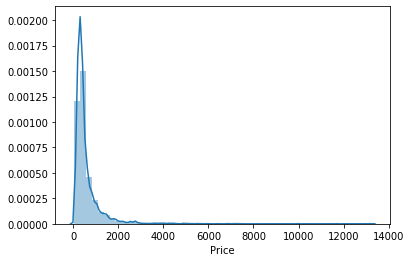

In [383]:
sns.distplot(train_label)
print(train_label.skew(), train_label.kurt())

0.4185067270993861 0.9782301714549271


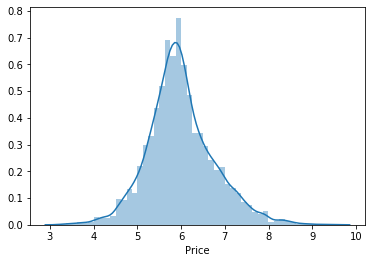

In [384]:
sns.distplot(np.log1p(train_label))
print(np.log1p(train_label).skew(), np.log1p(train_label).kurt())

In [385]:
train_label = train_label.apply(lambda x: np.log1p(x))

df = pd.DataFrame(pd.concat([train[c], test[c]], axis = 0), columns =train.columns)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in train.columns:
    if train[c].ftype == 'category:dense' :
        df[c] = le.fit_transform(pd.concat([train[c], test[c]], axis = 0))
    else :
        df[c] = pd.concat([train[c], test[c]], axis = 0)

In [386]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
print(train.shape, test.shape)

(6228, 772) (1560, 772)


In [387]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)

# ML

In [388]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [389]:
score = cross_val_score(xgb.XGBRegressor(), train, train_label, scoring='neg_mean_squared_error', cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:09:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:10:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:10:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [390]:
score

array([-0.36296758, -0.35602933, -0.40939934])

In [392]:
param_xgb = {}
param_xgb['learning_rate'] = 0.06
param_xgb['seed'] = 555
param_xgb['eval_metric'] = 'rmse'
param_xgb['objective'] = 'reg:linear'

param_lgb = {}
param_lgb['objective'] = 'regression'
param_lgb['learning_rate'] = 0.01
param_lgb['seed'] = 444
param_lgb['metric'] = 'rmse'

def func(train, train_label, test, name):
    pred = pd.DataFrame(data = np.zeros(shape = (train.shape[0], 3)))
    pred.columns = [a for a in range(3)]
    
    pred_test = pd.DataFrame(data = np.zeros(shape = (test.shape[0], 3)))
    pred_test.columns = [a for a in range(3)]
    
    k = KFold(n_splits=3, shuffle=True, random_state=2222)
    i = 0
    for t_index, v_index in k.split(train_label.ravel()):
        xtrain , ytrain = train.loc[t_index,:], train_label[t_index]
        xtest , ytest = train.loc[v_index,:], train_label[v_index]
        if(name == 'lgb'):
            trainset = lgb.Dataset(xtrain, label=ytrain)
            testset = lgb.Dataset(xtest, label=ytest)
            best = lgb.train(param_lgb , trainset, valid_sets=[trainset,testset], num_boost_round=10000,
                             early_stopping_rounds= 200)
            pred.loc[v_index,i] = best.predict(xtest, best_iteration = best.best_iteration)
            
            pred_test.loc[:,i] = best.predict(test, best_iteration = best.best_iteration)
            i = i +1
            
        else : 
            trainset = xgb.DMatrix(xtrain, label=ytrain)
            testset = xgb.DMatrix(xtest,label=ytest)
            t = xgb.DMatrix(test)
            best = xgb.train(list(param_xgb.items()) ,trainset, evals=[(trainset, 'train'),(testset,'test')],
                    num_boost_round=10000, early_stopping_rounds= 200)
            pred.loc[v_index,i] = best.predict(testset, ntree_limit = best.best_ntree_limit)
            
            pred_test.loc[:,i] = best.predict(t, ntree_limit = best.best_ntree_limit)
            i = i +1
    
    return(pred,pred_test,best)

In [393]:
train_xgb, test_xgb, model = func(train,train_label, test, 'xgb')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:10:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:5.21362	test-rmse:5.22773
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.90687	test-rmse:4.92049
[2]	train-rmse:4.61887	test-rmse:4.6324
[3]	train-rmse:4.34842	test-rmse:4.36127
[4]	train-rmse:4.09448	test-rmse:4.10712
[5]	train-rmse:3.85614	test-rmse:3.86817
[6]	train-rmse:3.63244	test-rmse:3.64405
[7]	train-rmse:3.42261	test-rmse:3.43366
[8]	train-rmse:3.22557	test-rmse:3.23658
[9]	train-rmse:3.04092	test-rmse:3.05132
[10]	train-rmse:2.8673	test-rmse:2.87749
[11]	train-rmse:2.70479	test-rmse:2.71471
[12]	train-rmse:2.55251	test-rmse:2.562
[13]	train-rmse:2.40944	test-rmse:2.41911
[14]	train-rmse:2.2756	test-rmse:2.28494
[15]	train-rmse:2.15026	test-rmse:2.15867
[16]	train-rmse:2.03297	test-rmse:2.04174
[17]	train-rmse:1.92315	test-rmse:1.93201

[182]	train-rmse:0.49053	test-rmse:0.576233
[183]	train-rmse:0.490346	test-rmse:0.576211
[184]	train-rmse:0.490125	test-rmse:0.576192
[185]	train-rmse:0.489973	test-rmse:0.576059
[186]	train-rmse:0.489784	test-rmse:0.576042
[187]	train-rmse:0.489603	test-rmse:0.575928
[188]	train-rmse:0.489411	test-rmse:0.575925
[189]	train-rmse:0.488687	test-rmse:0.575903
[190]	train-rmse:0.48855	test-rmse:0.575812
[191]	train-rmse:0.488424	test-rmse:0.575809
[192]	train-rmse:0.488244	test-rmse:0.575756
[193]	train-rmse:0.487832	test-rmse:0.575672
[194]	train-rmse:0.487438	test-rmse:0.575404
[195]	train-rmse:0.487269	test-rmse:0.57543
[196]	train-rmse:0.487055	test-rmse:0.575432
[197]	train-rmse:0.486865	test-rmse:0.57545
[198]	train-rmse:0.486676	test-rmse:0.575374
[199]	train-rmse:0.486517	test-rmse:0.575427
[200]	train-rmse:0.486335	test-rmse:0.575303
[201]	train-rmse:0.486199	test-rmse:0.575318
[202]	train-rmse:0.486061	test-rmse:0.57524
[203]	train-rmse:0.48586	test-rmse:0.57519
[204]	train-rmse:

[366]	train-rmse:0.449749	test-rmse:0.567673
[367]	train-rmse:0.449616	test-rmse:0.567546
[368]	train-rmse:0.449311	test-rmse:0.567501
[369]	train-rmse:0.449241	test-rmse:0.567473
[370]	train-rmse:0.448795	test-rmse:0.567383
[371]	train-rmse:0.448722	test-rmse:0.56733
[372]	train-rmse:0.448629	test-rmse:0.567359
[373]	train-rmse:0.448563	test-rmse:0.567371
[374]	train-rmse:0.447998	test-rmse:0.567364
[375]	train-rmse:0.447932	test-rmse:0.567389
[376]	train-rmse:0.447848	test-rmse:0.567397
[377]	train-rmse:0.447724	test-rmse:0.56735
[378]	train-rmse:0.447503	test-rmse:0.567354
[379]	train-rmse:0.447422	test-rmse:0.56734
[380]	train-rmse:0.446569	test-rmse:0.567358
[381]	train-rmse:0.446352	test-rmse:0.567319
[382]	train-rmse:0.446105	test-rmse:0.567255
[383]	train-rmse:0.445949	test-rmse:0.567246
[384]	train-rmse:0.445778	test-rmse:0.567182
[385]	train-rmse:0.445707	test-rmse:0.567173
[386]	train-rmse:0.445644	test-rmse:0.567199
[387]	train-rmse:0.445556	test-rmse:0.567139
[388]	train-r

[549]	train-rmse:0.423125	test-rmse:0.565697
[550]	train-rmse:0.423079	test-rmse:0.565659
[551]	train-rmse:0.423016	test-rmse:0.565629
[552]	train-rmse:0.422924	test-rmse:0.565548
[553]	train-rmse:0.42285	test-rmse:0.565471
[554]	train-rmse:0.422506	test-rmse:0.565387
[555]	train-rmse:0.421901	test-rmse:0.565345
[556]	train-rmse:0.421758	test-rmse:0.565322
[557]	train-rmse:0.421705	test-rmse:0.5653
[558]	train-rmse:0.421593	test-rmse:0.56529
[559]	train-rmse:0.421476	test-rmse:0.56525
[560]	train-rmse:0.421399	test-rmse:0.565255
[561]	train-rmse:0.421255	test-rmse:0.565273
[562]	train-rmse:0.421213	test-rmse:0.565267
[563]	train-rmse:0.421026	test-rmse:0.565338
[564]	train-rmse:0.420948	test-rmse:0.5654
[565]	train-rmse:0.420877	test-rmse:0.565426
[566]	train-rmse:0.4208	test-rmse:0.565441
[567]	train-rmse:0.420609	test-rmse:0.565486
[568]	train-rmse:0.42044	test-rmse:0.565522
[569]	train-rmse:0.420356	test-rmse:0.565517
[570]	train-rmse:0.420256	test-rmse:0.56552
[571]	train-rmse:0.42

[733]	train-rmse:0.402569	test-rmse:0.565651
[734]	train-rmse:0.402456	test-rmse:0.565751
[735]	train-rmse:0.40232	test-rmse:0.56579
[736]	train-rmse:0.401852	test-rmse:0.56583
[737]	train-rmse:0.401718	test-rmse:0.565892
[738]	train-rmse:0.401683	test-rmse:0.565874
[739]	train-rmse:0.401592	test-rmse:0.565887
[740]	train-rmse:0.401503	test-rmse:0.565945
[741]	train-rmse:0.401441	test-rmse:0.565926
[742]	train-rmse:0.401374	test-rmse:0.56592
[743]	train-rmse:0.401343	test-rmse:0.565924
[744]	train-rmse:0.401109	test-rmse:0.565829
[745]	train-rmse:0.400779	test-rmse:0.565814
[746]	train-rmse:0.400726	test-rmse:0.565859
[747]	train-rmse:0.400684	test-rmse:0.565857
[748]	train-rmse:0.400654	test-rmse:0.565878
[749]	train-rmse:0.400434	test-rmse:0.565802
[750]	train-rmse:0.400343	test-rmse:0.565795
[751]	train-rmse:0.400309	test-rmse:0.565807
[752]	train-rmse:0.400152	test-rmse:0.565789
[753]	train-rmse:0.400054	test-rmse:0.56581
[754]	train-rmse:0.39984	test-rmse:0.565787
[755]	train-rmse

[23:13:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:5.2219	test-rmse:5.21022
Multiple eval metrics have been passed: 'test-rmse' will be used for early stopping.

Will train until test-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4.91454	test-rmse:4.90394
[2]	train-rmse:4.62591	test-rmse:4.61608
[3]	train-rmse:4.35492	test-rmse:4.3459
[4]	train-rmse:4.10054	test-rmse:4.09224
[5]	train-rmse:3.86162	test-rmse:3.85446
[6]	train-rmse:3.63745	test-rmse:3.63126
[7]	train-rmse:3.4271	test-rmse:3.42201
[8]	train-rmse:3.22963	test-rmse:3.22503
[9]	train-rmse:3.04436	test-rmse:3.04038
[10]	train-rmse:2.8706	test-rmse:2.86709
[11]	train-rmse:2.70767	test-rmse:2.70506
[12]	train-rmse:2.55451	test-rmse:2.55274
[13]	train-rmse:2.41134	test-rmse:2.41077
[14]	train-rmse:2.27684	test-rmse:2.27753
[15]	train-rmse:2.15114	test-rmse:2.15301
[16]	train-rmse:2.03337	test-rmse:2.03679
[17]	train-rmse:1.92291	test-rmse:1.9279

[181]	train-rmse:0.484067	test-rmse:0.601201
[182]	train-rmse:0.483946	test-rmse:0.601144
[183]	train-rmse:0.483813	test-rmse:0.601062
[184]	train-rmse:0.483685	test-rmse:0.601036
[185]	train-rmse:0.483563	test-rmse:0.600943
[186]	train-rmse:0.483393	test-rmse:0.600763
[187]	train-rmse:0.483002	test-rmse:0.60054
[188]	train-rmse:0.48263	test-rmse:0.600576
[189]	train-rmse:0.482461	test-rmse:0.600566
[190]	train-rmse:0.482233	test-rmse:0.600492
[191]	train-rmse:0.48209	test-rmse:0.600494
[192]	train-rmse:0.48196	test-rmse:0.600397
[193]	train-rmse:0.48173	test-rmse:0.600388
[194]	train-rmse:0.481543	test-rmse:0.600293
[195]	train-rmse:0.481431	test-rmse:0.600272
[196]	train-rmse:0.480998	test-rmse:0.600106
[197]	train-rmse:0.480854	test-rmse:0.600013
[198]	train-rmse:0.480727	test-rmse:0.599932
[199]	train-rmse:0.480485	test-rmse:0.599794
[200]	train-rmse:0.480163	test-rmse:0.599772
[201]	train-rmse:0.480052	test-rmse:0.599672
[202]	train-rmse:0.479942	test-rmse:0.599645
[203]	train-rms

[365]	train-rmse:0.450309	test-rmse:0.591468
[366]	train-rmse:0.450124	test-rmse:0.59146
[367]	train-rmse:0.450048	test-rmse:0.591461
[368]	train-rmse:0.449959	test-rmse:0.591508
[369]	train-rmse:0.449896	test-rmse:0.591501
[370]	train-rmse:0.449781	test-rmse:0.591442
[371]	train-rmse:0.448939	test-rmse:0.591223
[372]	train-rmse:0.448823	test-rmse:0.591282
[373]	train-rmse:0.448755	test-rmse:0.591244
[374]	train-rmse:0.448596	test-rmse:0.591138
[375]	train-rmse:0.448519	test-rmse:0.591115
[376]	train-rmse:0.448133	test-rmse:0.59106
[377]	train-rmse:0.448029	test-rmse:0.591042
[378]	train-rmse:0.447936	test-rmse:0.590965
[379]	train-rmse:0.447601	test-rmse:0.590885
[380]	train-rmse:0.447537	test-rmse:0.59091
[381]	train-rmse:0.447454	test-rmse:0.590929
[382]	train-rmse:0.447321	test-rmse:0.590933
[383]	train-rmse:0.447205	test-rmse:0.590884
[384]	train-rmse:0.447117	test-rmse:0.590871
[385]	train-rmse:0.446842	test-rmse:0.590935
[386]	train-rmse:0.446744	test-rmse:0.590932
[387]	train-r

[548]	train-rmse:0.426298	test-rmse:0.586709
[549]	train-rmse:0.426221	test-rmse:0.58674
[550]	train-rmse:0.426176	test-rmse:0.586763
[551]	train-rmse:0.426134	test-rmse:0.586769
[552]	train-rmse:0.426079	test-rmse:0.586766
[553]	train-rmse:0.425914	test-rmse:0.586764
[554]	train-rmse:0.425849	test-rmse:0.586757
[555]	train-rmse:0.425569	test-rmse:0.586751
[556]	train-rmse:0.425417	test-rmse:0.586753
[557]	train-rmse:0.42519	test-rmse:0.58677
[558]	train-rmse:0.424903	test-rmse:0.586674
[559]	train-rmse:0.424851	test-rmse:0.586673
[560]	train-rmse:0.424787	test-rmse:0.586679
[561]	train-rmse:0.424746	test-rmse:0.586657
[562]	train-rmse:0.424668	test-rmse:0.586676
[563]	train-rmse:0.424625	test-rmse:0.586673
[564]	train-rmse:0.424512	test-rmse:0.586631
[565]	train-rmse:0.424417	test-rmse:0.58662
[566]	train-rmse:0.424372	test-rmse:0.586598
[567]	train-rmse:0.424304	test-rmse:0.586585
[568]	train-rmse:0.42425	test-rmse:0.586558
[569]	train-rmse:0.423846	test-rmse:0.586301
[570]	train-rms

[731]	train-rmse:0.404674	test-rmse:0.583605
[732]	train-rmse:0.404593	test-rmse:0.583577
[733]	train-rmse:0.404561	test-rmse:0.583545
[734]	train-rmse:0.404498	test-rmse:0.583549
[735]	train-rmse:0.404469	test-rmse:0.583577
[736]	train-rmse:0.404338	test-rmse:0.583563
[737]	train-rmse:0.40428	test-rmse:0.583559
[738]	train-rmse:0.404247	test-rmse:0.583583
[739]	train-rmse:0.404212	test-rmse:0.583596
[740]	train-rmse:0.403974	test-rmse:0.583528
[741]	train-rmse:0.403873	test-rmse:0.58353
[742]	train-rmse:0.403834	test-rmse:0.583532
[743]	train-rmse:0.40379	test-rmse:0.583559
[744]	train-rmse:0.403454	test-rmse:0.583421
[745]	train-rmse:0.403404	test-rmse:0.583394
[746]	train-rmse:0.403326	test-rmse:0.583387
[747]	train-rmse:0.403296	test-rmse:0.583388
[748]	train-rmse:0.403256	test-rmse:0.583404
[749]	train-rmse:0.4032	test-rmse:0.583444
[750]	train-rmse:0.403167	test-rmse:0.583415
[751]	train-rmse:0.403084	test-rmse:0.583415
[752]	train-rmse:0.403037	test-rmse:0.583426
[753]	train-rms

[914]	train-rmse:0.388306	test-rmse:0.58185
[915]	train-rmse:0.388275	test-rmse:0.581801
[916]	train-rmse:0.38825	test-rmse:0.581806
[917]	train-rmse:0.388208	test-rmse:0.581805
[918]	train-rmse:0.388181	test-rmse:0.581795
[919]	train-rmse:0.387785	test-rmse:0.581754
[920]	train-rmse:0.387753	test-rmse:0.581759
[921]	train-rmse:0.387606	test-rmse:0.581813
[922]	train-rmse:0.387332	test-rmse:0.581749
[923]	train-rmse:0.387246	test-rmse:0.581677
[924]	train-rmse:0.387207	test-rmse:0.581656
[925]	train-rmse:0.387181	test-rmse:0.581634
[926]	train-rmse:0.387153	test-rmse:0.581646
[927]	train-rmse:0.387091	test-rmse:0.581653
[928]	train-rmse:0.386992	test-rmse:0.581693
[929]	train-rmse:0.386965	test-rmse:0.581709
[930]	train-rmse:0.386807	test-rmse:0.581716
[931]	train-rmse:0.386761	test-rmse:0.581747
[932]	train-rmse:0.386678	test-rmse:0.581769
[933]	train-rmse:0.386653	test-rmse:0.581747
[934]	train-rmse:0.386582	test-rmse:0.581694
[935]	train-rmse:0.386521	test-rmse:0.581691
[936]	train-

[1095]	train-rmse:0.372855	test-rmse:0.581109
[1096]	train-rmse:0.372749	test-rmse:0.581183
[1097]	train-rmse:0.372645	test-rmse:0.581195
[1098]	train-rmse:0.372625	test-rmse:0.581194
[1099]	train-rmse:0.372566	test-rmse:0.581191
[1100]	train-rmse:0.372534	test-rmse:0.581143
[1101]	train-rmse:0.37247	test-rmse:0.581157
[1102]	train-rmse:0.372449	test-rmse:0.581158
[1103]	train-rmse:0.372383	test-rmse:0.58117
[1104]	train-rmse:0.37229	test-rmse:0.581228
[1105]	train-rmse:0.372265	test-rmse:0.581191
[1106]	train-rmse:0.372207	test-rmse:0.581192
[1107]	train-rmse:0.372175	test-rmse:0.581182
[1108]	train-rmse:0.372155	test-rmse:0.581164
[1109]	train-rmse:0.372132	test-rmse:0.581199
[1110]	train-rmse:0.372108	test-rmse:0.581198
[1111]	train-rmse:0.372091	test-rmse:0.581222
[1112]	train-rmse:0.371903	test-rmse:0.581176
[1113]	train-rmse:0.371876	test-rmse:0.581174
[1114]	train-rmse:0.371672	test-rmse:0.581122
[1115]	train-rmse:0.371642	test-rmse:0.58115
[1116]	train-rmse:0.371618	test-rmse:0

[1274]	train-rmse:0.360202	test-rmse:0.581086
[1275]	train-rmse:0.360187	test-rmse:0.581098
[1276]	train-rmse:0.360168	test-rmse:0.581068
[1277]	train-rmse:0.360152	test-rmse:0.581089
[1278]	train-rmse:0.360138	test-rmse:0.581083
[1279]	train-rmse:0.359987	test-rmse:0.581105
[1280]	train-rmse:0.359962	test-rmse:0.581138
[1281]	train-rmse:0.359939	test-rmse:0.581145
[1282]	train-rmse:0.359918	test-rmse:0.581145
[1283]	train-rmse:0.359902	test-rmse:0.581146
[1284]	train-rmse:0.359887	test-rmse:0.581143
[1285]	train-rmse:0.359868	test-rmse:0.581129
[1286]	train-rmse:0.359851	test-rmse:0.58115
[1287]	train-rmse:0.359719	test-rmse:0.581189
[1288]	train-rmse:0.3597	test-rmse:0.581238
[1289]	train-rmse:0.359634	test-rmse:0.58125
[1290]	train-rmse:0.359531	test-rmse:0.581245
[1291]	train-rmse:0.359514	test-rmse:0.581253
[1292]	train-rmse:0.359455	test-rmse:0.581299
[1293]	train-rmse:0.359428	test-rmse:0.581284
[1294]	train-rmse:0.359112	test-rmse:0.581262
[1295]	train-rmse:0.359048	test-rmse:0

[1454]	train-rmse:0.343593	test-rmse:0.579895
[1455]	train-rmse:0.343423	test-rmse:0.579874
[1456]	train-rmse:0.343408	test-rmse:0.579878
[1457]	train-rmse:0.343396	test-rmse:0.579877
[1458]	train-rmse:0.343313	test-rmse:0.579857
[1459]	train-rmse:0.343176	test-rmse:0.579881
[1460]	train-rmse:0.343162	test-rmse:0.579882
[1461]	train-rmse:0.343143	test-rmse:0.579879
[1462]	train-rmse:0.343064	test-rmse:0.579897
[1463]	train-rmse:0.342986	test-rmse:0.579855
[1464]	train-rmse:0.342972	test-rmse:0.579857
[1465]	train-rmse:0.342871	test-rmse:0.57988
[1466]	train-rmse:0.342854	test-rmse:0.579886
[1467]	train-rmse:0.342834	test-rmse:0.579883
[1468]	train-rmse:0.342783	test-rmse:0.579921
[1469]	train-rmse:0.342765	test-rmse:0.579922
[1470]	train-rmse:0.342745	test-rmse:0.579948
[1471]	train-rmse:0.342732	test-rmse:0.579962
[1472]	train-rmse:0.342522	test-rmse:0.579944
[1473]	train-rmse:0.342502	test-rmse:0.579934
[1474]	train-rmse:0.342485	test-rmse:0.579946
[1475]	train-rmse:0.342455	test-rms

[1633]	train-rmse:0.330029	test-rmse:0.579626
[1634]	train-rmse:0.330017	test-rmse:0.579621
[1635]	train-rmse:0.329997	test-rmse:0.579626
[1636]	train-rmse:0.329983	test-rmse:0.579632
[1637]	train-rmse:0.329861	test-rmse:0.579621
[1638]	train-rmse:0.329725	test-rmse:0.579598
[1639]	train-rmse:0.329709	test-rmse:0.579596
[1640]	train-rmse:0.329698	test-rmse:0.579612
[1641]	train-rmse:0.329421	test-rmse:0.579515
[1642]	train-rmse:0.329392	test-rmse:0.579514
[1643]	train-rmse:0.329374	test-rmse:0.579517
[1644]	train-rmse:0.329354	test-rmse:0.579525
[1645]	train-rmse:0.329336	test-rmse:0.579518
[1646]	train-rmse:0.329304	test-rmse:0.57952
[1647]	train-rmse:0.329283	test-rmse:0.579517
[1648]	train-rmse:0.329267	test-rmse:0.57953
[1649]	train-rmse:0.328986	test-rmse:0.579624
[1650]	train-rmse:0.328688	test-rmse:0.579593
[1651]	train-rmse:0.328631	test-rmse:0.57962
[1652]	train-rmse:0.328395	test-rmse:0.579555
[1653]	train-rmse:0.328091	test-rmse:0.579254
[1654]	train-rmse:0.327882	test-rmse:

[1813]	train-rmse:0.31725	test-rmse:0.578931
[1814]	train-rmse:0.317205	test-rmse:0.578941
[1815]	train-rmse:0.317005	test-rmse:0.578941
[1816]	train-rmse:0.316993	test-rmse:0.578936
[1817]	train-rmse:0.316931	test-rmse:0.578972
[1818]	train-rmse:0.316698	test-rmse:0.578861
[1819]	train-rmse:0.316687	test-rmse:0.57886
[1820]	train-rmse:0.316652	test-rmse:0.578887
[1821]	train-rmse:0.316637	test-rmse:0.578887
[1822]	train-rmse:0.316624	test-rmse:0.578893
[1823]	train-rmse:0.316614	test-rmse:0.578898
[1824]	train-rmse:0.316605	test-rmse:0.578909
[1825]	train-rmse:0.316592	test-rmse:0.578911
[1826]	train-rmse:0.316567	test-rmse:0.578915
[1827]	train-rmse:0.316549	test-rmse:0.578929
[1828]	train-rmse:0.316483	test-rmse:0.578919
[1829]	train-rmse:0.316467	test-rmse:0.578965
[1830]	train-rmse:0.316412	test-rmse:0.578987
[1831]	train-rmse:0.316398	test-rmse:0.578997
[1832]	train-rmse:0.316378	test-rmse:0.578992
[1833]	train-rmse:0.316359	test-rmse:0.578988
[1834]	train-rmse:0.31635	test-rmse:

[72]	train-rmse:0.533264	test-rmse:0.613552
[73]	train-rmse:0.532319	test-rmse:0.613005
[74]	train-rmse:0.531502	test-rmse:0.612489
[75]	train-rmse:0.530237	test-rmse:0.612173
[76]	train-rmse:0.529497	test-rmse:0.611775
[77]	train-rmse:0.52868	test-rmse:0.611478
[78]	train-rmse:0.528094	test-rmse:0.611141
[79]	train-rmse:0.526071	test-rmse:0.610322
[80]	train-rmse:0.525339	test-rmse:0.60974
[81]	train-rmse:0.524799	test-rmse:0.609375
[82]	train-rmse:0.524353	test-rmse:0.609059
[83]	train-rmse:0.523789	test-rmse:0.609014
[84]	train-rmse:0.5234	test-rmse:0.60888
[85]	train-rmse:0.522681	test-rmse:0.608705
[86]	train-rmse:0.522189	test-rmse:0.608374
[87]	train-rmse:0.521641	test-rmse:0.607796
[88]	train-rmse:0.521308	test-rmse:0.607791
[89]	train-rmse:0.520655	test-rmse:0.607834
[90]	train-rmse:0.520275	test-rmse:0.607631
[91]	train-rmse:0.518616	test-rmse:0.607154
[92]	train-rmse:0.518314	test-rmse:0.606994
[93]	train-rmse:0.518032	test-rmse:0.606912
[94]	train-rmse:0.516793	test-rmse:0.

[256]	train-rmse:0.468878	test-rmse:0.59435
[257]	train-rmse:0.468741	test-rmse:0.59432
[258]	train-rmse:0.468639	test-rmse:0.59423
[259]	train-rmse:0.468521	test-rmse:0.594279
[260]	train-rmse:0.468416	test-rmse:0.594195
[261]	train-rmse:0.468158	test-rmse:0.594074
[262]	train-rmse:0.468049	test-rmse:0.594067
[263]	train-rmse:0.46772	test-rmse:0.594046
[264]	train-rmse:0.467581	test-rmse:0.594009
[265]	train-rmse:0.467117	test-rmse:0.593906
[266]	train-rmse:0.467027	test-rmse:0.593875
[267]	train-rmse:0.466899	test-rmse:0.593862
[268]	train-rmse:0.466652	test-rmse:0.593853
[269]	train-rmse:0.466533	test-rmse:0.593805
[270]	train-rmse:0.466014	test-rmse:0.593806
[271]	train-rmse:0.465859	test-rmse:0.593764
[272]	train-rmse:0.465769	test-rmse:0.593734
[273]	train-rmse:0.465689	test-rmse:0.593726
[274]	train-rmse:0.464982	test-rmse:0.593619
[275]	train-rmse:0.464841	test-rmse:0.593625
[276]	train-rmse:0.464599	test-rmse:0.593584
[277]	train-rmse:0.464509	test-rmse:0.593572
[278]	train-rm

[439]	train-rmse:0.437074	test-rmse:0.589495
[440]	train-rmse:0.436998	test-rmse:0.589462
[441]	train-rmse:0.436942	test-rmse:0.589449
[442]	train-rmse:0.436823	test-rmse:0.589453
[443]	train-rmse:0.43674	test-rmse:0.589406
[444]	train-rmse:0.436674	test-rmse:0.589417
[445]	train-rmse:0.436541	test-rmse:0.589454
[446]	train-rmse:0.43648	test-rmse:0.58942
[447]	train-rmse:0.436416	test-rmse:0.589418
[448]	train-rmse:0.436259	test-rmse:0.589363
[449]	train-rmse:0.436201	test-rmse:0.589365
[450]	train-rmse:0.436116	test-rmse:0.589349
[451]	train-rmse:0.435822	test-rmse:0.589482
[452]	train-rmse:0.435563	test-rmse:0.589485
[453]	train-rmse:0.435405	test-rmse:0.589463
[454]	train-rmse:0.435105	test-rmse:0.58946
[455]	train-rmse:0.435029	test-rmse:0.589419
[456]	train-rmse:0.434912	test-rmse:0.589378
[457]	train-rmse:0.434662	test-rmse:0.589319
[458]	train-rmse:0.434315	test-rmse:0.589336
[459]	train-rmse:0.43421	test-rmse:0.589321
[460]	train-rmse:0.434152	test-rmse:0.589301
[461]	train-rms

[623]	train-rmse:0.413189	test-rmse:0.587764
[624]	train-rmse:0.41314	test-rmse:0.587758
[625]	train-rmse:0.412973	test-rmse:0.587752
[626]	train-rmse:0.412791	test-rmse:0.587819
[627]	train-rmse:0.412732	test-rmse:0.58784
[628]	train-rmse:0.41264	test-rmse:0.587847
[629]	train-rmse:0.412579	test-rmse:0.587813
[630]	train-rmse:0.412095	test-rmse:0.587757
[631]	train-rmse:0.412035	test-rmse:0.587733
[632]	train-rmse:0.411968	test-rmse:0.587698
[633]	train-rmse:0.411934	test-rmse:0.587676
[634]	train-rmse:0.411896	test-rmse:0.587663
[635]	train-rmse:0.411854	test-rmse:0.587658
[636]	train-rmse:0.411628	test-rmse:0.58768
[637]	train-rmse:0.411564	test-rmse:0.587686
[638]	train-rmse:0.411455	test-rmse:0.58762
[639]	train-rmse:0.411422	test-rmse:0.587609
[640]	train-rmse:0.411388	test-rmse:0.587586
[641]	train-rmse:0.411345	test-rmse:0.587608
[642]	train-rmse:0.411291	test-rmse:0.58763
[643]	train-rmse:0.411251	test-rmse:0.5876
[644]	train-rmse:0.411195	test-rmse:0.587584
[645]	train-rmse:0

[807]	train-rmse:0.393792	test-rmse:0.588059
[808]	train-rmse:0.393753	test-rmse:0.588056
[809]	train-rmse:0.393688	test-rmse:0.588033
[810]	train-rmse:0.393505	test-rmse:0.588001
[811]	train-rmse:0.393463	test-rmse:0.588007
[812]	train-rmse:0.393312	test-rmse:0.588008
[813]	train-rmse:0.393272	test-rmse:0.58796
[814]	train-rmse:0.393238	test-rmse:0.587933
[815]	train-rmse:0.393212	test-rmse:0.587935
[816]	train-rmse:0.393178	test-rmse:0.587902
[817]	train-rmse:0.393073	test-rmse:0.587962
[818]	train-rmse:0.393045	test-rmse:0.58799
[819]	train-rmse:0.393	test-rmse:0.587981
[820]	train-rmse:0.392704	test-rmse:0.587934
[821]	train-rmse:0.392675	test-rmse:0.587942
[822]	train-rmse:0.392571	test-rmse:0.58801
[823]	train-rmse:0.39218	test-rmse:0.587976
[824]	train-rmse:0.392072	test-rmse:0.58802
[825]	train-rmse:0.392013	test-rmse:0.588024
[826]	train-rmse:0.391985	test-rmse:0.58804
[827]	train-rmse:0.391949	test-rmse:0.588015
[828]	train-rmse:0.391693	test-rmse:0.588029
[829]	train-rmse:0.

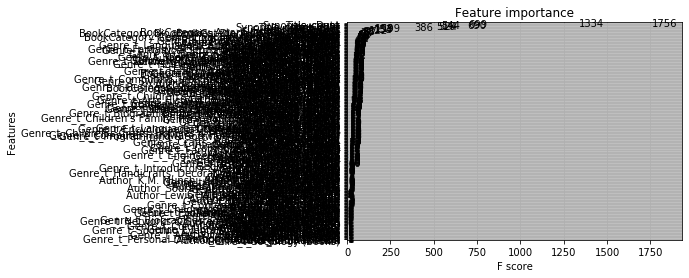

In [394]:
xgb.plot_importance(model)

In [395]:
train_lgb, test_lgb ,model = func(train,train_label,test,'lgb')

[1]	training's rmse: 0.765659	valid_1's rmse: 0.747919
Training until validation scores don't improve for 200 rounds.
[2]	training's rmse: 0.763347	valid_1's rmse: 0.745797
[3]	training's rmse: 0.761101	valid_1's rmse: 0.743712
[4]	training's rmse: 0.758894	valid_1's rmse: 0.741667
[5]	training's rmse: 0.756683	valid_1's rmse: 0.739598
[6]	training's rmse: 0.754546	valid_1's rmse: 0.737615
[7]	training's rmse: 0.75242	valid_1's rmse: 0.735625
[8]	training's rmse: 0.750306	valid_1's rmse: 0.733658
[9]	training's rmse: 0.748249	valid_1's rmse: 0.731712
[10]	training's rmse: 0.746216	valid_1's rmse: 0.729782
[11]	training's rmse: 0.744227	valid_1's rmse: 0.727922
[12]	training's rmse: 0.742229	valid_1's rmse: 0.726099
[13]	training's rmse: 0.740308	valid_1's rmse: 0.724311
[14]	training's rmse: 0.738403	valid_1's rmse: 0.722509
[15]	training's rmse: 0.736497	valid_1's rmse: 0.720777
[16]	training's rmse: 0.734637	valid_1's rmse: 0.719
[17]	training's rmse: 0.732809	valid_1's rmse: 0.71732

[167]	training's rmse: 0.598019	valid_1's rmse: 0.615699
[168]	training's rmse: 0.597526	valid_1's rmse: 0.615383
[169]	training's rmse: 0.597061	valid_1's rmse: 0.615073
[170]	training's rmse: 0.596551	valid_1's rmse: 0.614765
[171]	training's rmse: 0.596054	valid_1's rmse: 0.614543
[172]	training's rmse: 0.595638	valid_1's rmse: 0.614303
[173]	training's rmse: 0.595152	valid_1's rmse: 0.614099
[174]	training's rmse: 0.594773	valid_1's rmse: 0.613921
[175]	training's rmse: 0.59429	valid_1's rmse: 0.613665
[176]	training's rmse: 0.593881	valid_1's rmse: 0.613473
[177]	training's rmse: 0.593475	valid_1's rmse: 0.613268
[178]	training's rmse: 0.592998	valid_1's rmse: 0.612978
[179]	training's rmse: 0.592605	valid_1's rmse: 0.612787
[180]	training's rmse: 0.592179	valid_1's rmse: 0.612522
[181]	training's rmse: 0.59172	valid_1's rmse: 0.612268
[182]	training's rmse: 0.591303	valid_1's rmse: 0.612042
[183]	training's rmse: 0.590869	valid_1's rmse: 0.611752
[184]	training's rmse: 0.590441	v

[317]	training's rmse: 0.54761	valid_1's rmse: 0.594718
[318]	training's rmse: 0.547386	valid_1's rmse: 0.594592
[319]	training's rmse: 0.547123	valid_1's rmse: 0.594463
[320]	training's rmse: 0.546886	valid_1's rmse: 0.594401
[321]	training's rmse: 0.546622	valid_1's rmse: 0.594291
[322]	training's rmse: 0.546345	valid_1's rmse: 0.594206
[323]	training's rmse: 0.546037	valid_1's rmse: 0.594099
[324]	training's rmse: 0.545797	valid_1's rmse: 0.594084
[325]	training's rmse: 0.545487	valid_1's rmse: 0.594004
[326]	training's rmse: 0.545204	valid_1's rmse: 0.593881
[327]	training's rmse: 0.544969	valid_1's rmse: 0.593868
[328]	training's rmse: 0.544725	valid_1's rmse: 0.593789
[329]	training's rmse: 0.544475	valid_1's rmse: 0.593643
[330]	training's rmse: 0.544171	valid_1's rmse: 0.593498
[331]	training's rmse: 0.543929	valid_1's rmse: 0.593424
[332]	training's rmse: 0.543691	valid_1's rmse: 0.593384
[333]	training's rmse: 0.543439	valid_1's rmse: 0.593274
[334]	training's rmse: 0.543155	

[480]	training's rmse: 0.512521	valid_1's rmse: 0.585159
[481]	training's rmse: 0.512366	valid_1's rmse: 0.585132
[482]	training's rmse: 0.51219	valid_1's rmse: 0.585145
[483]	training's rmse: 0.511985	valid_1's rmse: 0.585087
[484]	training's rmse: 0.511754	valid_1's rmse: 0.585079
[485]	training's rmse: 0.511566	valid_1's rmse: 0.58504
[486]	training's rmse: 0.511396	valid_1's rmse: 0.584975
[487]	training's rmse: 0.511223	valid_1's rmse: 0.584992
[488]	training's rmse: 0.511024	valid_1's rmse: 0.584936
[489]	training's rmse: 0.510871	valid_1's rmse: 0.584937
[490]	training's rmse: 0.510689	valid_1's rmse: 0.584927
[491]	training's rmse: 0.510505	valid_1's rmse: 0.584894
[492]	training's rmse: 0.51031	valid_1's rmse: 0.58485
[493]	training's rmse: 0.510132	valid_1's rmse: 0.584847
[494]	training's rmse: 0.509957	valid_1's rmse: 0.584802
[495]	training's rmse: 0.509789	valid_1's rmse: 0.584791
[496]	training's rmse: 0.509609	valid_1's rmse: 0.584756
[497]	training's rmse: 0.509466	val

[657]	training's rmse: 0.483783	valid_1's rmse: 0.581423
[658]	training's rmse: 0.483621	valid_1's rmse: 0.581421
[659]	training's rmse: 0.483437	valid_1's rmse: 0.581406
[660]	training's rmse: 0.483307	valid_1's rmse: 0.581365
[661]	training's rmse: 0.483166	valid_1's rmse: 0.581385
[662]	training's rmse: 0.483008	valid_1's rmse: 0.581369
[663]	training's rmse: 0.482878	valid_1's rmse: 0.581318
[664]	training's rmse: 0.482708	valid_1's rmse: 0.581318
[665]	training's rmse: 0.482518	valid_1's rmse: 0.581316
[666]	training's rmse: 0.482378	valid_1's rmse: 0.581302
[667]	training's rmse: 0.482247	valid_1's rmse: 0.581263
[668]	training's rmse: 0.482127	valid_1's rmse: 0.581255
[669]	training's rmse: 0.481972	valid_1's rmse: 0.581245
[670]	training's rmse: 0.481843	valid_1's rmse: 0.581274
[671]	training's rmse: 0.481684	valid_1's rmse: 0.581243
[672]	training's rmse: 0.481534	valid_1's rmse: 0.581239
[673]	training's rmse: 0.481359	valid_1's rmse: 0.581245
[674]	training's rmse: 0.481223

[838]	training's rmse: 0.459642	valid_1's rmse: 0.579684
[839]	training's rmse: 0.459549	valid_1's rmse: 0.57966
[840]	training's rmse: 0.45941	valid_1's rmse: 0.579648
[841]	training's rmse: 0.459256	valid_1's rmse: 0.579617
[842]	training's rmse: 0.459123	valid_1's rmse: 0.579617
[843]	training's rmse: 0.459004	valid_1's rmse: 0.57958
[844]	training's rmse: 0.458867	valid_1's rmse: 0.579564
[845]	training's rmse: 0.45874	valid_1's rmse: 0.579553
[846]	training's rmse: 0.458654	valid_1's rmse: 0.57955
[847]	training's rmse: 0.458552	valid_1's rmse: 0.579542
[848]	training's rmse: 0.458464	valid_1's rmse: 0.579535
[849]	training's rmse: 0.458354	valid_1's rmse: 0.579534
[850]	training's rmse: 0.458266	valid_1's rmse: 0.579503
[851]	training's rmse: 0.458131	valid_1's rmse: 0.579483
[852]	training's rmse: 0.457993	valid_1's rmse: 0.579446
[853]	training's rmse: 0.457897	valid_1's rmse: 0.579425
[854]	training's rmse: 0.457767	valid_1's rmse: 0.579416
[855]	training's rmse: 0.457658	vali

[1020]	training's rmse: 0.438188	valid_1's rmse: 0.57805
[1021]	training's rmse: 0.438049	valid_1's rmse: 0.578035
[1022]	training's rmse: 0.437927	valid_1's rmse: 0.578047
[1023]	training's rmse: 0.437829	valid_1's rmse: 0.578055
[1024]	training's rmse: 0.43773	valid_1's rmse: 0.578078
[1025]	training's rmse: 0.437623	valid_1's rmse: 0.578046
[1026]	training's rmse: 0.437528	valid_1's rmse: 0.578064
[1027]	training's rmse: 0.437401	valid_1's rmse: 0.57803
[1028]	training's rmse: 0.437289	valid_1's rmse: 0.578026
[1029]	training's rmse: 0.437165	valid_1's rmse: 0.577988
[1030]	training's rmse: 0.43706	valid_1's rmse: 0.577991
[1031]	training's rmse: 0.436927	valid_1's rmse: 0.578008
[1032]	training's rmse: 0.436802	valid_1's rmse: 0.577989
[1033]	training's rmse: 0.43668	valid_1's rmse: 0.577989
[1034]	training's rmse: 0.436582	valid_1's rmse: 0.577991
[1035]	training's rmse: 0.436473	valid_1's rmse: 0.577983
[1036]	training's rmse: 0.436378	valid_1's rmse: 0.578006
[1037]	training's r

[1207]	training's rmse: 0.419431	valid_1's rmse: 0.578365
[1208]	training's rmse: 0.419325	valid_1's rmse: 0.578368
[1209]	training's rmse: 0.419191	valid_1's rmse: 0.578323
[1210]	training's rmse: 0.419051	valid_1's rmse: 0.578296
[1211]	training's rmse: 0.418933	valid_1's rmse: 0.578294
[1212]	training's rmse: 0.418815	valid_1's rmse: 0.578308
[1213]	training's rmse: 0.418729	valid_1's rmse: 0.5783
[1214]	training's rmse: 0.418593	valid_1's rmse: 0.578305
[1215]	training's rmse: 0.418526	valid_1's rmse: 0.578304
[1216]	training's rmse: 0.418443	valid_1's rmse: 0.578309
[1217]	training's rmse: 0.418357	valid_1's rmse: 0.578303
[1218]	training's rmse: 0.418274	valid_1's rmse: 0.578313
[1219]	training's rmse: 0.418177	valid_1's rmse: 0.578311
[1220]	training's rmse: 0.418044	valid_1's rmse: 0.57832
[1221]	training's rmse: 0.417956	valid_1's rmse: 0.578331
[1222]	training's rmse: 0.417835	valid_1's rmse: 0.57831
[1223]	training's rmse: 0.417753	valid_1's rmse: 0.578325
[1224]	training's 

[126]	training's rmse: 0.614432	valid_1's rmse: 0.661357
[127]	training's rmse: 0.613823	valid_1's rmse: 0.660929
[128]	training's rmse: 0.613267	valid_1's rmse: 0.660511
[129]	training's rmse: 0.612671	valid_1's rmse: 0.660118
[130]	training's rmse: 0.612084	valid_1's rmse: 0.659712
[131]	training's rmse: 0.611542	valid_1's rmse: 0.659376
[132]	training's rmse: 0.610957	valid_1's rmse: 0.659012
[133]	training's rmse: 0.610417	valid_1's rmse: 0.658745
[134]	training's rmse: 0.60984	valid_1's rmse: 0.658373
[135]	training's rmse: 0.609301	valid_1's rmse: 0.65802
[136]	training's rmse: 0.608739	valid_1's rmse: 0.657628
[137]	training's rmse: 0.608195	valid_1's rmse: 0.657431
[138]	training's rmse: 0.607648	valid_1's rmse: 0.657064
[139]	training's rmse: 0.606923	valid_1's rmse: 0.656525
[140]	training's rmse: 0.606423	valid_1's rmse: 0.65623
[141]	training's rmse: 0.605716	valid_1's rmse: 0.655696
[142]	training's rmse: 0.60523	valid_1's rmse: 0.655396
[143]	training's rmse: 0.604699	val

[318]	training's rmse: 0.538904	valid_1's rmse: 0.619686
[319]	training's rmse: 0.538655	valid_1's rmse: 0.619565
[320]	training's rmse: 0.538406	valid_1's rmse: 0.619483
[321]	training's rmse: 0.538179	valid_1's rmse: 0.619428
[322]	training's rmse: 0.537916	valid_1's rmse: 0.619308
[323]	training's rmse: 0.537702	valid_1's rmse: 0.619241
[324]	training's rmse: 0.537473	valid_1's rmse: 0.619154
[325]	training's rmse: 0.537237	valid_1's rmse: 0.619013
[326]	training's rmse: 0.537015	valid_1's rmse: 0.618943
[327]	training's rmse: 0.536782	valid_1's rmse: 0.618788
[328]	training's rmse: 0.536539	valid_1's rmse: 0.618675
[329]	training's rmse: 0.536334	valid_1's rmse: 0.618582
[330]	training's rmse: 0.535994	valid_1's rmse: 0.618457
[331]	training's rmse: 0.535738	valid_1's rmse: 0.618374
[332]	training's rmse: 0.535507	valid_1's rmse: 0.618325
[333]	training's rmse: 0.535291	valid_1's rmse: 0.618229
[334]	training's rmse: 0.535046	valid_1's rmse: 0.618137
[335]	training's rmse: 0.53482	

[474]	training's rmse: 0.506786	valid_1's rmse: 0.610541
[475]	training's rmse: 0.506597	valid_1's rmse: 0.610501
[476]	training's rmse: 0.506482	valid_1's rmse: 0.61049
[477]	training's rmse: 0.506333	valid_1's rmse: 0.610446
[478]	training's rmse: 0.506178	valid_1's rmse: 0.610416
[479]	training's rmse: 0.506055	valid_1's rmse: 0.610398
[480]	training's rmse: 0.50584	valid_1's rmse: 0.610349
[481]	training's rmse: 0.505661	valid_1's rmse: 0.610319
[482]	training's rmse: 0.505459	valid_1's rmse: 0.610268
[483]	training's rmse: 0.505321	valid_1's rmse: 0.610225
[484]	training's rmse: 0.505178	valid_1's rmse: 0.61021
[485]	training's rmse: 0.505007	valid_1's rmse: 0.610177
[486]	training's rmse: 0.504867	valid_1's rmse: 0.610174
[487]	training's rmse: 0.504695	valid_1's rmse: 0.610125
[488]	training's rmse: 0.504536	valid_1's rmse: 0.610096
[489]	training's rmse: 0.50437	valid_1's rmse: 0.610068
[490]	training's rmse: 0.50421	valid_1's rmse: 0.610043
[491]	training's rmse: 0.504024	vali

[647]	training's rmse: 0.480436	valid_1's rmse: 0.605968
[648]	training's rmse: 0.480325	valid_1's rmse: 0.605963
[649]	training's rmse: 0.48021	valid_1's rmse: 0.60597
[650]	training's rmse: 0.480061	valid_1's rmse: 0.605938
[651]	training's rmse: 0.479907	valid_1's rmse: 0.605915
[652]	training's rmse: 0.479783	valid_1's rmse: 0.605905
[653]	training's rmse: 0.479664	valid_1's rmse: 0.605908
[654]	training's rmse: 0.479514	valid_1's rmse: 0.605893
[655]	training's rmse: 0.479402	valid_1's rmse: 0.605884
[656]	training's rmse: 0.479294	valid_1's rmse: 0.605836
[657]	training's rmse: 0.479184	valid_1's rmse: 0.605824
[658]	training's rmse: 0.479028	valid_1's rmse: 0.605814
[659]	training's rmse: 0.47892	valid_1's rmse: 0.605802
[660]	training's rmse: 0.478789	valid_1's rmse: 0.605808
[661]	training's rmse: 0.47863	valid_1's rmse: 0.605782
[662]	training's rmse: 0.478525	valid_1's rmse: 0.605737
[663]	training's rmse: 0.4784	valid_1's rmse: 0.605703
[664]	training's rmse: 0.47829	valid_

[825]	training's rmse: 0.458171	valid_1's rmse: 0.603291
[826]	training's rmse: 0.458051	valid_1's rmse: 0.60326
[827]	training's rmse: 0.457919	valid_1's rmse: 0.603254
[828]	training's rmse: 0.457782	valid_1's rmse: 0.603206
[829]	training's rmse: 0.457651	valid_1's rmse: 0.60322
[830]	training's rmse: 0.457522	valid_1's rmse: 0.603212
[831]	training's rmse: 0.457398	valid_1's rmse: 0.603163
[832]	training's rmse: 0.457309	valid_1's rmse: 0.603162
[833]	training's rmse: 0.457188	valid_1's rmse: 0.603162
[834]	training's rmse: 0.457061	valid_1's rmse: 0.603114
[835]	training's rmse: 0.456955	valid_1's rmse: 0.6031
[836]	training's rmse: 0.456836	valid_1's rmse: 0.603093
[837]	training's rmse: 0.456702	valid_1's rmse: 0.603078
[838]	training's rmse: 0.456578	valid_1's rmse: 0.603064
[839]	training's rmse: 0.456441	valid_1's rmse: 0.603062
[840]	training's rmse: 0.456329	valid_1's rmse: 0.60304
[841]	training's rmse: 0.456216	valid_1's rmse: 0.603023
[842]	training's rmse: 0.45609	valid

[1007]	training's rmse: 0.437595	valid_1's rmse: 0.601129
[1008]	training's rmse: 0.437502	valid_1's rmse: 0.601109
[1009]	training's rmse: 0.437412	valid_1's rmse: 0.601097
[1010]	training's rmse: 0.437305	valid_1's rmse: 0.6011
[1011]	training's rmse: 0.437196	valid_1's rmse: 0.601084
[1012]	training's rmse: 0.437091	valid_1's rmse: 0.601112
[1013]	training's rmse: 0.437001	valid_1's rmse: 0.601104
[1014]	training's rmse: 0.436881	valid_1's rmse: 0.601113
[1015]	training's rmse: 0.436771	valid_1's rmse: 0.601107
[1016]	training's rmse: 0.43665	valid_1's rmse: 0.601085
[1017]	training's rmse: 0.436542	valid_1's rmse: 0.601072
[1018]	training's rmse: 0.436431	valid_1's rmse: 0.601092
[1019]	training's rmse: 0.436325	valid_1's rmse: 0.601118
[1020]	training's rmse: 0.436236	valid_1's rmse: 0.601089
[1021]	training's rmse: 0.43615	valid_1's rmse: 0.601077
[1022]	training's rmse: 0.43606	valid_1's rmse: 0.60104
[1023]	training's rmse: 0.43592	valid_1's rmse: 0.601036
[1024]	training's rms

[1193]	training's rmse: 0.419156	valid_1's rmse: 0.599735
[1194]	training's rmse: 0.419086	valid_1's rmse: 0.599727
[1195]	training's rmse: 0.418995	valid_1's rmse: 0.599714
[1196]	training's rmse: 0.418898	valid_1's rmse: 0.599672
[1197]	training's rmse: 0.418766	valid_1's rmse: 0.599679
[1198]	training's rmse: 0.418686	valid_1's rmse: 0.599668
[1199]	training's rmse: 0.418588	valid_1's rmse: 0.599642
[1200]	training's rmse: 0.418518	valid_1's rmse: 0.599626
[1201]	training's rmse: 0.418446	valid_1's rmse: 0.599657
[1202]	training's rmse: 0.418371	valid_1's rmse: 0.599659
[1203]	training's rmse: 0.418266	valid_1's rmse: 0.599669
[1204]	training's rmse: 0.418157	valid_1's rmse: 0.599692
[1205]	training's rmse: 0.418064	valid_1's rmse: 0.599658
[1206]	training's rmse: 0.417998	valid_1's rmse: 0.599681
[1207]	training's rmse: 0.417874	valid_1's rmse: 0.599684
[1208]	training's rmse: 0.417779	valid_1's rmse: 0.599674
[1209]	training's rmse: 0.417695	valid_1's rmse: 0.599671
[1210]	trainin

[1374]	training's rmse: 0.403407	valid_1's rmse: 0.598878
[1375]	training's rmse: 0.403339	valid_1's rmse: 0.598898
[1376]	training's rmse: 0.403244	valid_1's rmse: 0.598883
[1377]	training's rmse: 0.403181	valid_1's rmse: 0.59887
[1378]	training's rmse: 0.403093	valid_1's rmse: 0.59886
[1379]	training's rmse: 0.403003	valid_1's rmse: 0.598848
[1380]	training's rmse: 0.4029	valid_1's rmse: 0.598818
[1381]	training's rmse: 0.402822	valid_1's rmse: 0.598828
[1382]	training's rmse: 0.402707	valid_1's rmse: 0.598822
[1383]	training's rmse: 0.402612	valid_1's rmse: 0.598805
[1384]	training's rmse: 0.40249	valid_1's rmse: 0.598786
[1385]	training's rmse: 0.402426	valid_1's rmse: 0.598783
[1386]	training's rmse: 0.402309	valid_1's rmse: 0.59875
[1387]	training's rmse: 0.402206	valid_1's rmse: 0.598736
[1388]	training's rmse: 0.402116	valid_1's rmse: 0.598708
[1389]	training's rmse: 0.402024	valid_1's rmse: 0.598693
[1390]	training's rmse: 0.401928	valid_1's rmse: 0.598689
[1391]	training's rm

[1555]	training's rmse: 0.388209	valid_1's rmse: 0.597927
[1556]	training's rmse: 0.388164	valid_1's rmse: 0.597927
[1557]	training's rmse: 0.388084	valid_1's rmse: 0.597933
[1558]	training's rmse: 0.388017	valid_1's rmse: 0.597927
[1559]	training's rmse: 0.387911	valid_1's rmse: 0.597899
[1560]	training's rmse: 0.38784	valid_1's rmse: 0.597906
[1561]	training's rmse: 0.387794	valid_1's rmse: 0.597911
[1562]	training's rmse: 0.387696	valid_1's rmse: 0.597919
[1563]	training's rmse: 0.387588	valid_1's rmse: 0.597904
[1564]	training's rmse: 0.387543	valid_1's rmse: 0.597903
[1565]	training's rmse: 0.387477	valid_1's rmse: 0.59791
[1566]	training's rmse: 0.38743	valid_1's rmse: 0.597904
[1567]	training's rmse: 0.387389	valid_1's rmse: 0.597908
[1568]	training's rmse: 0.387291	valid_1's rmse: 0.597878
[1569]	training's rmse: 0.387229	valid_1's rmse: 0.597875
[1570]	training's rmse: 0.387133	valid_1's rmse: 0.597884
[1571]	training's rmse: 0.387044	valid_1's rmse: 0.597857
[1572]	training's

[1737]	training's rmse: 0.373635	valid_1's rmse: 0.597102
[1738]	training's rmse: 0.37355	valid_1's rmse: 0.597093
[1739]	training's rmse: 0.373506	valid_1's rmse: 0.597082
[1740]	training's rmse: 0.373428	valid_1's rmse: 0.597097
[1741]	training's rmse: 0.373323	valid_1's rmse: 0.597112
[1742]	training's rmse: 0.373248	valid_1's rmse: 0.597106
[1743]	training's rmse: 0.373159	valid_1's rmse: 0.597086
[1744]	training's rmse: 0.373099	valid_1's rmse: 0.597093
[1745]	training's rmse: 0.37302	valid_1's rmse: 0.597096
[1746]	training's rmse: 0.372948	valid_1's rmse: 0.597101
[1747]	training's rmse: 0.372863	valid_1's rmse: 0.597112
[1748]	training's rmse: 0.37279	valid_1's rmse: 0.59712
[1749]	training's rmse: 0.372704	valid_1's rmse: 0.597112
[1750]	training's rmse: 0.372645	valid_1's rmse: 0.597119
[1751]	training's rmse: 0.372561	valid_1's rmse: 0.597131
[1752]	training's rmse: 0.372491	valid_1's rmse: 0.597144
[1753]	training's rmse: 0.372425	valid_1's rmse: 0.597164
[1754]	training's 

[1925]	training's rmse: 0.359835	valid_1's rmse: 0.597104
[1926]	training's rmse: 0.359758	valid_1's rmse: 0.597107
[1927]	training's rmse: 0.359678	valid_1's rmse: 0.597102
[1928]	training's rmse: 0.359605	valid_1's rmse: 0.597113
[1929]	training's rmse: 0.359531	valid_1's rmse: 0.597101
[1930]	training's rmse: 0.359475	valid_1's rmse: 0.597087
[1931]	training's rmse: 0.359387	valid_1's rmse: 0.597054
[1932]	training's rmse: 0.359332	valid_1's rmse: 0.597051
[1933]	training's rmse: 0.359272	valid_1's rmse: 0.597067
[1934]	training's rmse: 0.359194	valid_1's rmse: 0.597065
[1935]	training's rmse: 0.359108	valid_1's rmse: 0.597026
[1936]	training's rmse: 0.359052	valid_1's rmse: 0.597018
[1937]	training's rmse: 0.358992	valid_1's rmse: 0.59703
[1938]	training's rmse: 0.358915	valid_1's rmse: 0.597026
[1939]	training's rmse: 0.358843	valid_1's rmse: 0.597038
[1940]	training's rmse: 0.358767	valid_1's rmse: 0.597042
[1941]	training's rmse: 0.358707	valid_1's rmse: 0.59704
[1942]	training'

[2115]	training's rmse: 0.347056	valid_1's rmse: 0.596702
[2116]	training's rmse: 0.346997	valid_1's rmse: 0.596703
[2117]	training's rmse: 0.346918	valid_1's rmse: 0.596691
[2118]	training's rmse: 0.346862	valid_1's rmse: 0.596692
[2119]	training's rmse: 0.34678	valid_1's rmse: 0.596681
[2120]	training's rmse: 0.346702	valid_1's rmse: 0.596663
[2121]	training's rmse: 0.346622	valid_1's rmse: 0.596661
[2122]	training's rmse: 0.346558	valid_1's rmse: 0.596663
[2123]	training's rmse: 0.34651	valid_1's rmse: 0.596651
[2124]	training's rmse: 0.346433	valid_1's rmse: 0.59664
[2125]	training's rmse: 0.346382	valid_1's rmse: 0.596641
[2126]	training's rmse: 0.346303	valid_1's rmse: 0.596649
[2127]	training's rmse: 0.346256	valid_1's rmse: 0.596642
[2128]	training's rmse: 0.346202	valid_1's rmse: 0.596642
[2129]	training's rmse: 0.346125	valid_1's rmse: 0.59665
[2130]	training's rmse: 0.346076	valid_1's rmse: 0.596642
[2131]	training's rmse: 0.346001	valid_1's rmse: 0.596634
[2132]	training's 

[2300]	training's rmse: 0.335372	valid_1's rmse: 0.596622
[2301]	training's rmse: 0.335304	valid_1's rmse: 0.596649
[2302]	training's rmse: 0.335208	valid_1's rmse: 0.596665
[2303]	training's rmse: 0.335156	valid_1's rmse: 0.596675
[2304]	training's rmse: 0.335078	valid_1's rmse: 0.596667
[2305]	training's rmse: 0.335001	valid_1's rmse: 0.59666
[2306]	training's rmse: 0.334908	valid_1's rmse: 0.596678
[2307]	training's rmse: 0.334856	valid_1's rmse: 0.596675
[2308]	training's rmse: 0.334786	valid_1's rmse: 0.596671
[2309]	training's rmse: 0.334724	valid_1's rmse: 0.596658
[2310]	training's rmse: 0.334664	valid_1's rmse: 0.596681
[2311]	training's rmse: 0.334583	valid_1's rmse: 0.59667
[2312]	training's rmse: 0.334523	valid_1's rmse: 0.59665
[2313]	training's rmse: 0.33449	valid_1's rmse: 0.596649
[2314]	training's rmse: 0.33441	valid_1's rmse: 0.596639
[2315]	training's rmse: 0.334342	valid_1's rmse: 0.596642
[2316]	training's rmse: 0.334288	valid_1's rmse: 0.596645
[2317]	training's r

[81]	training's rmse: 0.649034	valid_1's rmse: 0.674321
[82]	training's rmse: 0.648065	valid_1's rmse: 0.67362
[83]	training's rmse: 0.647152	valid_1's rmse: 0.672821
[84]	training's rmse: 0.646212	valid_1's rmse: 0.67208
[85]	training's rmse: 0.645393	valid_1's rmse: 0.671434
[86]	training's rmse: 0.644509	valid_1's rmse: 0.670698
[87]	training's rmse: 0.643754	valid_1's rmse: 0.6701
[88]	training's rmse: 0.642894	valid_1's rmse: 0.669381
[89]	training's rmse: 0.642001	valid_1's rmse: 0.668772
[90]	training's rmse: 0.641209	valid_1's rmse: 0.668196
[91]	training's rmse: 0.640349	valid_1's rmse: 0.66752
[92]	training's rmse: 0.63948	valid_1's rmse: 0.666851
[93]	training's rmse: 0.638667	valid_1's rmse: 0.666293
[94]	training's rmse: 0.637852	valid_1's rmse: 0.665615
[95]	training's rmse: 0.637013	valid_1's rmse: 0.665066
[96]	training's rmse: 0.636189	valid_1's rmse: 0.664399
[97]	training's rmse: 0.635444	valid_1's rmse: 0.663899
[98]	training's rmse: 0.63464	valid_1's rmse: 0.663315

[264]	training's rmse: 0.555076	valid_1's rmse: 0.615372
[265]	training's rmse: 0.554791	valid_1's rmse: 0.615308
[266]	training's rmse: 0.554481	valid_1's rmse: 0.615138
[267]	training's rmse: 0.554189	valid_1's rmse: 0.61498
[268]	training's rmse: 0.553909	valid_1's rmse: 0.614921
[269]	training's rmse: 0.553614	valid_1's rmse: 0.614778
[270]	training's rmse: 0.55333	valid_1's rmse: 0.614669
[271]	training's rmse: 0.553015	valid_1's rmse: 0.614557
[272]	training's rmse: 0.552733	valid_1's rmse: 0.614468
[273]	training's rmse: 0.55246	valid_1's rmse: 0.614409
[274]	training's rmse: 0.552161	valid_1's rmse: 0.614236
[275]	training's rmse: 0.551848	valid_1's rmse: 0.614109
[276]	training's rmse: 0.551534	valid_1's rmse: 0.613968
[277]	training's rmse: 0.551269	valid_1's rmse: 0.613854
[278]	training's rmse: 0.551017	valid_1's rmse: 0.6137
[279]	training's rmse: 0.550646	valid_1's rmse: 0.613554
[280]	training's rmse: 0.550342	valid_1's rmse: 0.613426
[281]	training's rmse: 0.550066	vali

[422]	training's rmse: 0.516928	valid_1's rmse: 0.60158
[423]	training's rmse: 0.516738	valid_1's rmse: 0.601566
[424]	training's rmse: 0.516547	valid_1's rmse: 0.601516
[425]	training's rmse: 0.516371	valid_1's rmse: 0.601457
[426]	training's rmse: 0.516193	valid_1's rmse: 0.601395
[427]	training's rmse: 0.516008	valid_1's rmse: 0.601343
[428]	training's rmse: 0.515772	valid_1's rmse: 0.601304
[429]	training's rmse: 0.51553	valid_1's rmse: 0.601253
[430]	training's rmse: 0.515327	valid_1's rmse: 0.601212
[431]	training's rmse: 0.515169	valid_1's rmse: 0.601195
[432]	training's rmse: 0.514959	valid_1's rmse: 0.601133
[433]	training's rmse: 0.514784	valid_1's rmse: 0.601092
[434]	training's rmse: 0.514625	valid_1's rmse: 0.601043
[435]	training's rmse: 0.514464	valid_1's rmse: 0.601011
[436]	training's rmse: 0.514295	valid_1's rmse: 0.600972
[437]	training's rmse: 0.514134	valid_1's rmse: 0.60092
[438]	training's rmse: 0.513929	valid_1's rmse: 0.60085
[439]	training's rmse: 0.513757	val

[592]	training's rmse: 0.487536	valid_1's rmse: 0.595232
[593]	training's rmse: 0.487384	valid_1's rmse: 0.595189
[594]	training's rmse: 0.487242	valid_1's rmse: 0.595154
[595]	training's rmse: 0.487083	valid_1's rmse: 0.595151
[596]	training's rmse: 0.486922	valid_1's rmse: 0.595123
[597]	training's rmse: 0.486761	valid_1's rmse: 0.595062
[598]	training's rmse: 0.486631	valid_1's rmse: 0.595058
[599]	training's rmse: 0.486474	valid_1's rmse: 0.595037
[600]	training's rmse: 0.486323	valid_1's rmse: 0.59502
[601]	training's rmse: 0.486187	valid_1's rmse: 0.594973
[602]	training's rmse: 0.486032	valid_1's rmse: 0.594938
[603]	training's rmse: 0.485901	valid_1's rmse: 0.594885
[604]	training's rmse: 0.485755	valid_1's rmse: 0.594874
[605]	training's rmse: 0.485605	valid_1's rmse: 0.594864
[606]	training's rmse: 0.485452	valid_1's rmse: 0.594801
[607]	training's rmse: 0.485302	valid_1's rmse: 0.594764
[608]	training's rmse: 0.485127	valid_1's rmse: 0.594731
[609]	training's rmse: 0.484987	

[770]	training's rmse: 0.462342	valid_1's rmse: 0.591533
[771]	training's rmse: 0.462231	valid_1's rmse: 0.591507
[772]	training's rmse: 0.46204	valid_1's rmse: 0.591434
[773]	training's rmse: 0.461902	valid_1's rmse: 0.59142
[774]	training's rmse: 0.461782	valid_1's rmse: 0.591396
[775]	training's rmse: 0.461655	valid_1's rmse: 0.591397
[776]	training's rmse: 0.461532	valid_1's rmse: 0.59135
[777]	training's rmse: 0.461393	valid_1's rmse: 0.591361
[778]	training's rmse: 0.461267	valid_1's rmse: 0.591347
[779]	training's rmse: 0.461137	valid_1's rmse: 0.591361
[780]	training's rmse: 0.461006	valid_1's rmse: 0.59134
[781]	training's rmse: 0.460857	valid_1's rmse: 0.591308
[782]	training's rmse: 0.460738	valid_1's rmse: 0.591288
[783]	training's rmse: 0.460606	valid_1's rmse: 0.59128
[784]	training's rmse: 0.460487	valid_1's rmse: 0.591232
[785]	training's rmse: 0.460363	valid_1's rmse: 0.591234
[786]	training's rmse: 0.460243	valid_1's rmse: 0.591239
[787]	training's rmse: 0.460135	vali

[954]	training's rmse: 0.4403	valid_1's rmse: 0.589015
[955]	training's rmse: 0.440173	valid_1's rmse: 0.589014
[956]	training's rmse: 0.440027	valid_1's rmse: 0.589009
[957]	training's rmse: 0.439919	valid_1's rmse: 0.589004
[958]	training's rmse: 0.439811	valid_1's rmse: 0.588983
[959]	training's rmse: 0.439712	valid_1's rmse: 0.588979
[960]	training's rmse: 0.439616	valid_1's rmse: 0.588958
[961]	training's rmse: 0.439523	valid_1's rmse: 0.588977
[962]	training's rmse: 0.439352	valid_1's rmse: 0.588935
[963]	training's rmse: 0.439278	valid_1's rmse: 0.58895
[964]	training's rmse: 0.439129	valid_1's rmse: 0.588952
[965]	training's rmse: 0.43903	valid_1's rmse: 0.588938
[966]	training's rmse: 0.438934	valid_1's rmse: 0.588908
[967]	training's rmse: 0.43881	valid_1's rmse: 0.588906
[968]	training's rmse: 0.438672	valid_1's rmse: 0.58889
[969]	training's rmse: 0.438555	valid_1's rmse: 0.588908
[970]	training's rmse: 0.438468	valid_1's rmse: 0.58889
[971]	training's rmse: 0.438354	valid_

[1139]	training's rmse: 0.420118	valid_1's rmse: 0.587672
[1140]	training's rmse: 0.420043	valid_1's rmse: 0.587658
[1141]	training's rmse: 0.419919	valid_1's rmse: 0.587669
[1142]	training's rmse: 0.419817	valid_1's rmse: 0.587643
[1143]	training's rmse: 0.419694	valid_1's rmse: 0.587613
[1144]	training's rmse: 0.419552	valid_1's rmse: 0.587588
[1145]	training's rmse: 0.419472	valid_1's rmse: 0.587604
[1146]	training's rmse: 0.419391	valid_1's rmse: 0.58763
[1147]	training's rmse: 0.419253	valid_1's rmse: 0.587634
[1148]	training's rmse: 0.419129	valid_1's rmse: 0.587646
[1149]	training's rmse: 0.419039	valid_1's rmse: 0.58763
[1150]	training's rmse: 0.418945	valid_1's rmse: 0.587636
[1151]	training's rmse: 0.418849	valid_1's rmse: 0.5876
[1152]	training's rmse: 0.418775	valid_1's rmse: 0.587598
[1153]	training's rmse: 0.418637	valid_1's rmse: 0.587597
[1154]	training's rmse: 0.418571	valid_1's rmse: 0.587585
[1155]	training's rmse: 0.418441	valid_1's rmse: 0.587574
[1156]	training's 

[1320]	training's rmse: 0.402346	valid_1's rmse: 0.587069
[1321]	training's rmse: 0.402251	valid_1's rmse: 0.587088
[1322]	training's rmse: 0.402111	valid_1's rmse: 0.587057
[1323]	training's rmse: 0.40201	valid_1's rmse: 0.587072
[1324]	training's rmse: 0.401913	valid_1's rmse: 0.587094
[1325]	training's rmse: 0.401833	valid_1's rmse: 0.587088
[1326]	training's rmse: 0.401701	valid_1's rmse: 0.587086
[1327]	training's rmse: 0.401584	valid_1's rmse: 0.587037
[1328]	training's rmse: 0.401502	valid_1's rmse: 0.587031
[1329]	training's rmse: 0.401403	valid_1's rmse: 0.587011
[1330]	training's rmse: 0.401292	valid_1's rmse: 0.587004
[1331]	training's rmse: 0.401202	valid_1's rmse: 0.586999
[1332]	training's rmse: 0.4011	valid_1's rmse: 0.587044
[1333]	training's rmse: 0.400988	valid_1's rmse: 0.587056
[1334]	training's rmse: 0.400853	valid_1's rmse: 0.587059
[1335]	training's rmse: 0.400744	valid_1's rmse: 0.587052
[1336]	training's rmse: 0.400657	valid_1's rmse: 0.587063
[1337]	training's

[1508]	training's rmse: 0.385333	valid_1's rmse: 0.587316
[1509]	training's rmse: 0.385271	valid_1's rmse: 0.587313
[1510]	training's rmse: 0.385175	valid_1's rmse: 0.587332
[1511]	training's rmse: 0.385108	valid_1's rmse: 0.587346
[1512]	training's rmse: 0.385023	valid_1's rmse: 0.587327
[1513]	training's rmse: 0.384922	valid_1's rmse: 0.587329
[1514]	training's rmse: 0.384855	valid_1's rmse: 0.58734
[1515]	training's rmse: 0.384798	valid_1's rmse: 0.587349
[1516]	training's rmse: 0.384676	valid_1's rmse: 0.587352
[1517]	training's rmse: 0.384562	valid_1's rmse: 0.587345
[1518]	training's rmse: 0.384493	valid_1's rmse: 0.587352
[1519]	training's rmse: 0.384417	valid_1's rmse: 0.587369
[1520]	training's rmse: 0.384314	valid_1's rmse: 0.587348
[1521]	training's rmse: 0.384204	valid_1's rmse: 0.587356
[1522]	training's rmse: 0.384098	valid_1's rmse: 0.587367
[1523]	training's rmse: 0.38404	valid_1's rmse: 0.587376
[1524]	training's rmse: 0.383981	valid_1's rmse: 0.587374
[1525]	training'

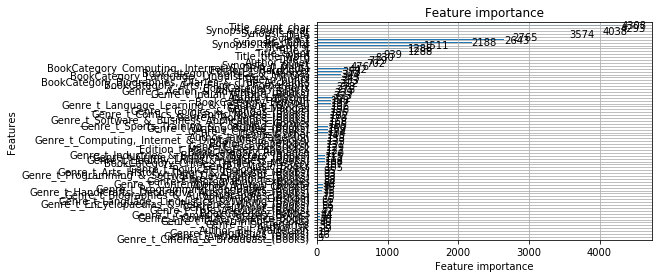

In [396]:
lgb.plot_importance(model)

In [402]:
test_lgb_1 = np.exp(test_lgb)-1
test_xgb_1 = np.exp(test_xgb)-1

In [411]:
answer1 = np.mean(test_lgb_1, axis = 1)

In [407]:
df = pd.concat([test_lgb_1, test_xgb_1], axis = 1)
answer1 = np.mean(df, axis = 1)

In [72]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=99)
rf.fit(train, train_label)
answer = rf.predict(test)

Wall time: 2min 43s


In [73]:
answer

array([6.02598266, 7.08194155, 5.74172927, ..., 5.88042424, 5.58749954,
       5.62104289])

In [624]:
sample.Price = np.exp(answer)-1

In [412]:
sample.Price = answer1.values

In [413]:
sample.to_excel('answer1.xlsx', index=False)

In [414]:
sample

,Price
0,360.876367
1,808.686552
2,369.361539
3,646.156318
4,350.002012
...,...
1555,1021.250888
1556,275.525392
1557,416.180004
1558,240.942479


In [79]:
pd.Series(rf.feature_importances_, index = train.columns)

Title_count                                    0.035456
Synopsis_count                                 0.072296
Title_count_char                               0.105480
Synopsis_count_char                            0.082890
Title_0                                        0.019086
                                                 ...   
Genre_t_Walking, Hiking & Trekking (Books)     0.000005
Genre_t_Words, Language & Grammar Reference    0.000002
Genre_t_Workbooks                              0.000001
Genre_t_Writing Guides (Books)                 0.002316
Genre_t_other                                  0.008709
Length: 765, dtype: float64

In [313]:
x

,0,1,2
0,5.777148,0.0,0.000000
1,0.000000,0.0,5.910837
2,5.912602,0.0,0.000000
3,5.640060,0.0,0.000000
4,5.920628,0.0,0.000000
...,...,...,...
6224,6.722651,0.0,0.000000
6225,0.000000,0.0,5.849282
6226,6.410926,0.0,0.000000
6227,5.705458,0.0,0.000000


In [630]:
(ntrain_xgb[0]

0       0.000000
1       0.000000
2       0.000000
3       5.405558
4       6.950172
          ...   
6224    6.043969
6225    0.000000
6226    5.796917
6227    0.000000
6228    0.000000
Name: 0, Length: 6229, dtype: float64